In [1]:
# from typing import Union, Collection
# from math import ceil
# from itertools import zip_longest
# from pathlib import Path

import numpy as np
from fastai.vision import *  

In [34]:
from typing import Union, Collection
from math import ceil
from itertools import zip_longest
from pathlib import Path

import matplotlib.pyplot as plt


def plot_many_images_with_pred(img_paths: Collection[Union[str, Path]], 
                               suptitle: str = None,
                               ncols: int = 6,
                               figsize_x: int = 18, 
                               figsize_y_per_row: int = 4):
    """Plot many images using subplots.
    Modified from https://github.com/jvanlier/til/blob/master/python/matplotlib-plot-many-images.md

    Automatically determines appropriate number of rows and turns off axes when a row can't be 
    filled completely.
    Automatically adjusts tight_layout rect if suptitle is provided.
    
    Args:
        img_paths: Collection (e.g. List/Array) of Path instances or plain old strings 
            with path of images to plot.
        suptitle: Title on top.
        ncols: number of columns
        figsize_x: the width of the image
        figsize_y_per_row: the height of the image *per row*. Usually requires some tweaking 
            depending on image size.
    """
    nrows = ceil(len(img_paths) / ncols)
    
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, 
                           figsize=(figsize_x, nrows * figsize_y_per_row), 
                           sharex=True, sharey=True)
    
    for img_path, ax in zip_longest(img_paths, axes.ravel()):
        if not img_path:
            ax.axis("off")
            continue
            
        img = plt.imread(str(img_path))
        ax.imshow(img)
        
        # Ok, this is a bit inefficient because we're predicting one-by-one instead of in batch.
        # But it's fast enough for my purposes here.
        pred = learn.predict(open_image(img_path))
        pred_str = "\n".join([f"{l}: {p:0.2f}" for l, p in zip(["BirdHome", "BirdRoaming"], pred[2])])
        ax.set_title(pred_str)
        
    if suptitle:
        plt.suptitle(suptitle)
        # Tight layout doesn't take into account suptitle, make a bit more room in the top:
        plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    else:
        plt.tight_layout()

    plt.show()

In [3]:
DATA_PATH = Path("~/data/split-v2-time/valid").expanduser()

In [4]:
learn = load_learner(Path("~/models/").expanduser(), "2020-05-27_resnet18.pkl")

In [38]:
def rnd_jpeg(path, k):
    return np.random.choice(list(path.glob("*.jpeg")), size=k, replace=False)

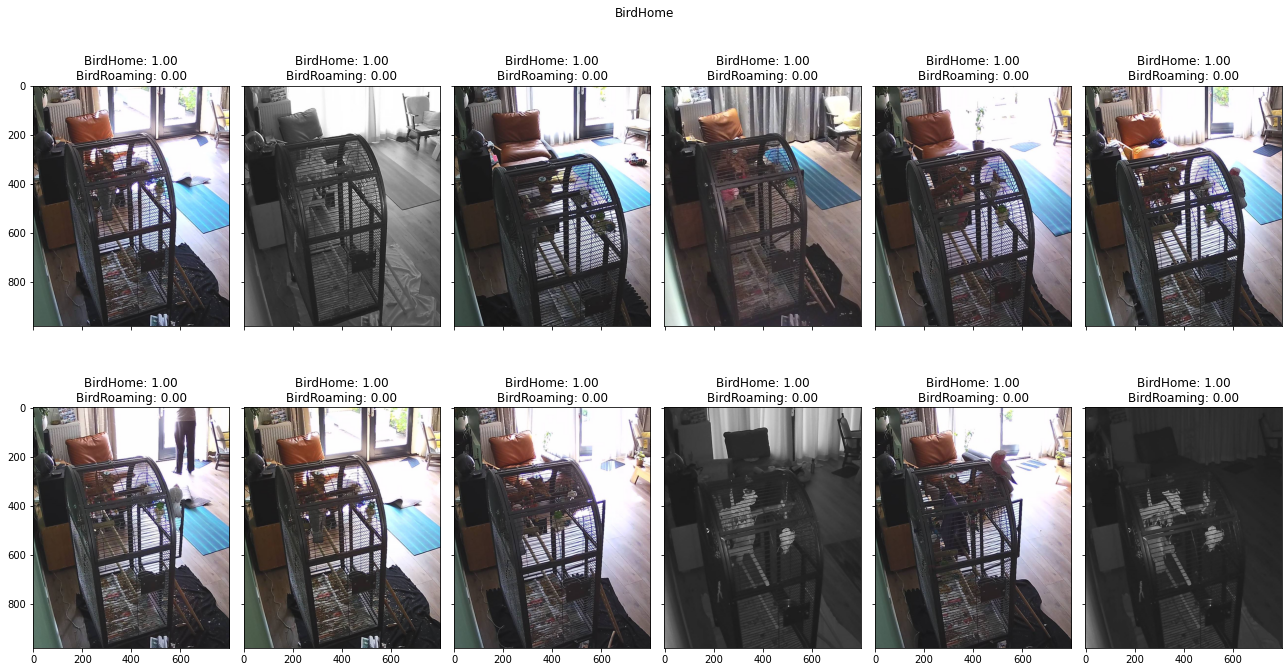

In [51]:
rnd_home = rnd_jpeg(DATA_PATH / "BirdHome", 12)
plot_many_images_with_pred(rnd_home, suptitle="BirdHome", figsize_y_per_row=5)

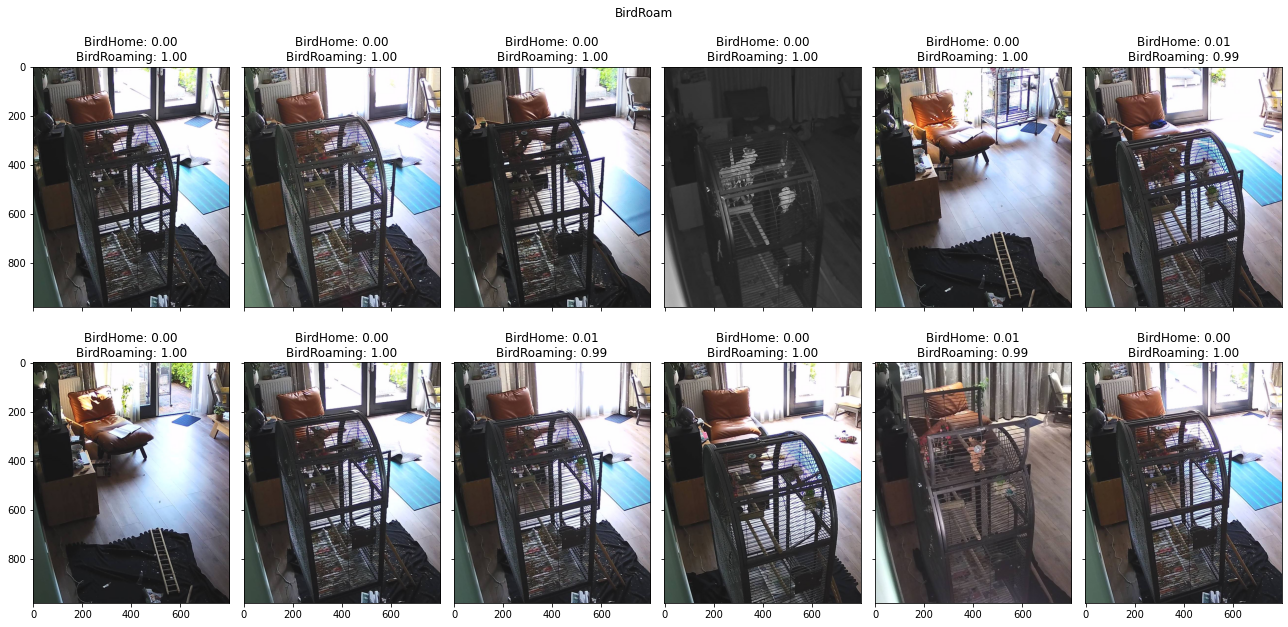

In [59]:
rnd_roam = rnd_jpeg(DATA_PATH / "BirdRoaming", 12) 
plot_many_images_with_pred(rnd_roam, suptitle="BirdRoam", figsize_y_per_row=4.5)

Ok, this seems pretty good.